In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense

In [ ]:
os.listdir('/content/drive/MyDrive/Datasets/Maskdata')

['without_mask', 'with_mask']

In [ ]:
os.listdir('/content/drive/MyDrive/Datasets/Mask data test')

['with_mask', 'without_mask']

In [ ]:
train_data='/content/drive/MyDrive/Datasets/Maskdata'
x_train=[]
y_train=[]
categories=['without_mask','with_mask']
for i in categories:
  path=os.path.join(train_data,i)
  images=os.listdir(path)
  for img in images:
    imgpath=os.path.join(path,img)
    img_array=imread(imgpath)
    img_resize=resize(img_array,(150,150,3))
    x_train.append(img_resize)
    y_train.append(categories.index(i))
  print('loaded',i)


loaded without_mask


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


loaded with_mask


In [ ]:
test_data='/content/drive/MyDrive/Datasets/Mask data test'
x_test=[]
y_test=[]
categories2=['without_mask','with_mask']
for i in categories2:
  path2=os.path.join(test_data,i)
  images2=os.listdir(path2)
  for img2 in images2:
    imgpath2=os.path.join(path2,img2)
    img_array2=imread(imgpath2)
    img_resize2=resize(img_array2,(150,150,3))
    x_test.append(img_resize2)
    y_test.append(categories2.index(i))
  print('loaded',i)

loaded without_mask
loaded with_mask


In [ ]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_train.shape

(3160, 150, 150, 3)

In [ ]:
y_train.shape

(3160,)

In [ ]:
x_test.shape

(102, 150, 150, 3)

In [ ]:
y_test.shape

(102,)

In [ ]:
from keras.layers import Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
32/32 [==============================] - 37s 1s/step - loss: 1.6797 - accuracy: 0.7649
Epoch 2/10
32/32 [==============================] - 36s 1s/step - loss: 0.2106 - accuracy: 0.9228
Epoch 3/10
32/32 [==============================] - 36s 1s/step - loss: 0.1500 - accuracy: 0.9481
Epoch 4/10
32/32 [==============================] - 35s 1s/step - loss: 0.1009 - accuracy: 0.9674
Epoch 5/10
32/32 [==============================] - 36s 1s/step - loss: 0.0591 - accuracy: 0.9854
Epoch 6/10
32/32 [==============================] - 37s 1s/step - loss: 0.0365 - accuracy: 0.9899
Epoch 7/10
32/32 [==============================] - 36s 1s/step - loss: 0.0266 - accuracy: 0.9965
Epoch 8/10
32/32 [==============================] - 41s 1s/step - loss: 0.0198 - accuracy: 0.9965
Epoch 9/10
32/32 [==============================] - 36s 1s/step - loss: 0.0150 - accuracy: 0.9981
Epoch 10/10
32/32 [==============================] - 36s 1s/step - loss: 0.0099 - accuracy: 0.9981


In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

4/4 [==============================] - 1s 90ms/step - loss: 0.1707 - accuracy: 0.9608
0.17066076397895813
0.9607843160629272


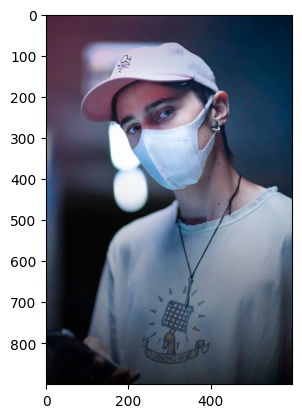

In [ ]:
import matplotlib.pyplot as plt
img=imread('/content/mask image2.jpg')
plt.imshow(img)

In [ ]:
img=resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [ ]:
img=img.reshape(1,150,150,3)
img

array([[[[0.29029117, 0.14127156, 0.2236245 ],
         [0.29069014, 0.14167053, 0.22402348],
         [0.29390841, 0.1448898 , 0.22723921],
         ...,
         [0.00722916, 0.08970102, 0.16403077],
         [0.00545414, 0.08109381, 0.15782258],
         [0.00523408, 0.08002671, 0.15705291]],

        [[0.29276194, 0.14374233, 0.22609527],
         [0.29340575, 0.14438614, 0.22673908],
         [0.2985985 , 0.1495793 , 0.23193194],
         ...,
         [0.00420562, 0.0967045 , 0.16670917],
         [0.00397389, 0.08964119, 0.16252059],
         [0.00394453, 0.08876487, 0.16199916]],

        [[0.29498472, 0.14596511, 0.22831805],
         [0.29569882, 0.14667921, 0.22903215],
         [0.30145857, 0.1524393 , 0.23479231],
         ...,
         [0.00096805, 0.1018802 , 0.16485703],
         [0.00251941, 0.09735736, 0.16601975],
         [0.00263505, 0.09671897, 0.16604268]],

        ...,

        [[0.019334  , 0.02330505, 0.03857254],
         [0.019334  , 0.02325922, 0.03876364]

In [ ]:
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 152ms/step


array([[1.0720247e-04, 9.9989283e-01]], dtype=float32)

In [ ]:
ind=y_new.argmax()
print(categories[ind])

with_mask
